In [1]:
import os
import sys
from osgeo import ogr
os.environ['QT_QPA_PLATFORM'] = 'offscreen'
sys.path.insert(0,'C:/Program Files/QGIS 3.10/apps/qgis/python')
from qgis.core import *
QgsApplication.setPrefixPath("C:/Program Files/QGIS 3.10/apps/qgis/lib", True) 
#from qgis.server import *
from qgis.gui import *
from qgis import processing

from qgis.PyQt.QtGui import QColor, QImage
from qgis.PyQt.QtCore import QSize, QBuffer, QIODevice

qgs = QgsApplication([], False)
qgs.initQgis()
print(QgsApplication.showSettings())

Application state:
QGIS_PREFIX_PATH env var:		C:/PROGRA~1/QGIS3~1.10/apps/qgis
Prefix:		C:/PROGRA~1/QGIS3~1.10/apps/qgis
Plugin Path:		C:/PROGRA~1/QGIS3~1.10/apps/qgis/plugins
Package Data Path:	C:/PROGRA~1/QGIS3~1.10/apps/qgis/.
Active Theme Name:	
Active Theme Path:	C:/PROGRA~1/QGIS3~1.10/apps/qgis/./resources/themes\\icons/
Default Theme Path:	:/images/themes/default/
SVG Search Paths:	C:/Program Files/QGIS 3.10/apps/qgis/lib/./svg/
		C:/PROGRA~1/QGIS3~1.10/apps/qgis/./svg/
		C:/Users/migue/AppData/Roaming/python3\profiles\default/svg/
User DB Path:	C:/PROGRA~1/QGIS3~1.10/apps/qgis/./resources/qgis.db
Auth DB Path:	C:/Users/migue/AppData/Roaming/python3\profiles\default/qgis-auth.db



In [2]:
import wget
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv"
wget.download(url, 'C:/Users/migue/Desktop/cases_country.csv')

100% [..............................................................................] 20389 / 20389

'C:/Users/migue/Desktop/cases_country (1).csv'

In [3]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.core.display import display, HTML

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets

In [4]:


# loading data right from the source:
death_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
country_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')



In [5]:
country_df.head()

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
0,Australia,2020-05-13 05:32:26,-25.0000,133.0000,6980,98,6271,611,27.415877,NaN,NaN,1.404011,36,AUS
1,Austria,2020-05-13 05:32:26,47.5162,14.5501,15961,623,14148,1190,177.218422,NaN,NaN,3.903264,40,AUT
2,Canada,2020-05-13 05:32:26,60.0010,-95.0010,72419,5300,34055,33064,191.302753,NaN,NaN,7.318521,124,CAN
3,China,2020-05-13 05:32:26,30.5928,114.3055,84018,4637,79224,157,5.981307,NaN,NaN,5.519055,156,CHN
4,Denmark,2020-05-13 05:32:26,56.0000,10.0000,10789,527,8778,1484,186.267643,NaN,NaN,4.884605,208,DNK


In [6]:
# Colocar o nome das colunas em minusulas
country_df.columns = map(str.lower, country_df.columns)
confirmed_df.columns = map(str.lower, confirmed_df.columns)
death_df.columns = map(str.lower, death_df.columns)
recovered_df.columns = map(str.lower, recovered_df.columns)

# mudar o nome de province/state para state e country/region para country

confirmed_df = confirmed_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
recovered_df = confirmed_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
death_df = death_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
country_df = country_df.rename(columns={'country_region': 'country'})


In [7]:
# total number of confirmed, death and recovered cases
confirmed_total = int(country_df['confirmed'].sum())
deaths_total = int(country_df['deaths'].sum())
recovered_total = int(country_df['recovered'].sum())
active_total = int(country_df['active'].sum())

In [8]:
print(" Confirmed: "  + str(confirmed_total))    
print(" Deaths: " + str(deaths_total))
print(" Recovered: " + str(recovered_total))

 Confirmed: 4262799
 Deaths: 291981
 Recovered: 1493661


In [9]:
sorted_country_df = country_df.sort_values('confirmed', ascending= False)
country_df.head()


,country,last_update,lat,long_,confirmed,deaths,recovered,active,incident_rate,people_tested,people_hospitalized,mortality_rate,uid,iso3
0,Australia,2020-05-13 05:32:26,-25.0000,133.0000,6980,98,6271,611,27.415877,NaN,NaN,1.404011,36,AUS
1,Austria,2020-05-13 05:32:26,47.5162,14.5501,15961,623,14148,1190,177.218422,NaN,NaN,3.903264,40,AUT
2,Canada,2020-05-13 05:32:26,60.0010,-95.0010,72419,5300,34055,33064,191.302753,NaN,NaN,7.318521,124,CAN
3,China,2020-05-13 05:32:26,30.5928,114.3055,84018,4637,79224,157,5.981307,NaN,NaN,5.519055,156,CHN
4,Denmark,2020-05-13 05:32:26,56.0000,10.0000,10789,527,8778,1484,186.267643,NaN,NaN,4.884605,208,DNK


In [10]:
vectorLyr=QgsVectorLayer("C:/Users/migue/Desktop/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp","Mundo","ogr")
vectorLyr.isValid()


uri='file:///C:/Users/migue/Desktop/cases_country.csv?delimiter=,'
infoLyr=QgsVectorLayer(uri,'Mundo','delimitedtext')
infoLyr.isValid()

QgsProject.instance().addMapLayer(vectorLyr)
QgsProject.instance().addMapLayer(infoLyr)
csvField='iso3'
shpField='ISO_A3'

joinObject=QgsVectorLayerJoinInfo()
joinObject.setJoinFieldName(csvField)
joinObject.setTargetFieldName(shpField)
joinObject.setJoinLayerId(infoLyr.id())
joinObject.setUsingMemoryCache(False)
joinObject.setJoinLayer(infoLyr)
vectorLyr.addJoin(joinObject)

vlayer = QgsProject.instance().mapLayersByName('Mundo')[0]

for field in vlayer.fields():
    print("Column "+field.name())
    

Column featurecla
Column scalerank
Column LABELRANK
Column SOVEREIGNT
Column SOV_A3
Column ADM0_DIF
Column LEVEL
Column TYPE
Column ADMIN
Column ADM0_A3
Column GEOU_DIF
Column GEOUNIT
Column GU_A3
Column SU_DIF
Column SUBUNIT
Column SU_A3
Column BRK_DIFF
Column NAME
Column NAME_LONG
Column BRK_A3
Column BRK_NAME
Column BRK_GROUP
Column ABBREV
Column POSTAL
Column FORMAL_EN
Column FORMAL_FR
Column NAME_CIAWF
Column NOTE_ADM0
Column NOTE_BRK
Column NAME_SORT
Column NAME_ALT
Column MAPCOLOR7
Column MAPCOLOR8
Column MAPCOLOR9
Column MAPCOLOR13
Column POP_EST
Column POP_RANK
Column GDP_MD_EST
Column POP_YEAR
Column LASTCENSUS
Column GDP_YEAR
Column ECONOMY
Column INCOME_GRP
Column WIKIPEDIA
Column FIPS_10_
Column ISO_A2
Column ISO_A3
Column ISO_A3_EH
Column ISO_N3
Column UN_A3
Column WB_A2
Column WB_A3
Column WOE_ID
Column WOE_ID_EH
Column WOE_NOTE
Column ADM0_A3_IS
Column ADM0_A3_US
Column ADM0_A3_UN
Column ADM0_A3_WB
Column CONTINENT
Column REGION_UN
Column SUBREGION
Column REGION_WB
Colu

In [11]:
from qgis.PyQt import QtGui
from qgis.PyQt.QtGui import QFont

myVectorLayer = QgsProject.instance().mapLayersByName('Mundo')[0]
targetField = 'Mundo_Confirmed'
myRangeList = []
myOpacity  = 1
print(myVectorLayer.geometryType())

# Make our first symbol and range...
myMin = 0.0
myMax = 6.0
myLabel = 'Group 1'
myColour = QtGui.QColor('#ffffff')
mySymbol1 = QgsSymbol.defaultSymbol(myVectorLayer.geometryType())
mySymbol1.setColor(myColour)
mySymbol1.setOpacity(myOpacity)
myRange1 = QgsRendererRange(myMin, myMax, mySymbol1, myLabel)
myRangeList.append(myRange1)

#now make another symbol and range...
myMin = 6.0
myMax = 500.0
myLabel = 'Group 2'
myColour = QtGui.QColor('#f09292')
mySymbol2 = QgsSymbol.defaultSymbol(
     myVectorLayer.geometryType())
mySymbol2.setColor(myColour)
mySymbol2.setOpacity(myOpacity)
myRange2 = QgsRendererRange(myMin, myMax, mySymbol2, myLabel)
myRangeList.append(myRange2)

#and another
myMin = 500.0
myMax = 1500.0
myLabel = 'Group 3'
myColour = QtGui.QColor('#f76868')
mySymbol3 = QgsSymbol.defaultSymbol(
     myVectorLayer.geometryType())
mySymbol3.setColor(myColour)
mySymbol3.setOpacity(myOpacity)
myRange3 = QgsRendererRange(myMin, myMax, mySymbol3, myLabel)
myRangeList.append(myRange3)

#aaaaaaaaaaaahh
myMin = 1500.0
myMax = 3000.0
myLabel = 'Group 4'
myColour = QtGui.QColor('#f24e4e')
mySymbol4 = QgsSymbol.defaultSymbol(
     myVectorLayer.geometryType())
mySymbol4.setColor(myColour)
mySymbol4.setOpacity(myOpacity)
myRange4 = QgsRendererRange(myMin, myMax, mySymbol4, myLabel)
myRangeList.append(myRange4)

#............
myMin = 3000.1
myMax = 7000.0
myLabel = 'Group 5'
myColour = QtGui.QColor('#f53636')
mySymbol5 = QgsSymbol.defaultSymbol(
     myVectorLayer.geometryType())
mySymbol5.setColor(myColour)
mySymbol5.setOpacity(myOpacity)
myRange5 = QgsRendererRange(myMin, myMax, mySymbol5, myLabel)
myRangeList.append(myRange5)

#and another one 
myMin = 7000.1
myMax = 10000.0
myLabel = 'Group 6'
myColour = QtGui.QColor('#f51b1b')
mySymbol6 = QgsSymbol.defaultSymbol(myVectorLayer.geometryType())
mySymbol6.setColor(myColour)
mySymbol6.setOpacity(myOpacity)
myRange6 = QgsRendererRange(myMin, myMax, mySymbol6, myLabel)
myRangeList.append(myRange6)

#and another one 
myMin = 10000.1
myMax = 1000000.0
myLabel = 'Group 7'
myColour = QtGui.QColor('#4f0000')
mySymbol7 = QgsSymbol.defaultSymbol(
     myVectorLayer.geometryType())
mySymbol7.setColor(myColour)
mySymbol7.setOpacity(myOpacity)
myRange7 = QgsRendererRange(myMin, myMax, mySymbol7, myLabel)
myRangeList.append(myRange7)

#and another one 
myMin = 1000000.1
myMax = 999999999999.0
myLabel = 'Group 8'
myColour = QtGui.QColor('#300202')
mySymbol8 = QgsSymbol.defaultSymbol(
     myVectorLayer.geometryType())
mySymbol8.setColor(myColour)
mySymbol8.setOpacity(myOpacity)
myRange8 = QgsRendererRange(myMin, myMax, mySymbol8, myLabel)
myRangeList.append(myRange8)


# create the renderer
groupRenderer = QgsGraduatedSymbolRenderer('', myRangeList)
groupRenderer.setMode(QgsGraduatedSymbolRenderer.EqualInterval)
groupRenderer.setClassAttribute(targetField)
 
# apply renderer to layer
vlayer.setRenderer(groupRenderer)

# Add Labels ########
layer_settings  = QgsPalLayerSettings()
text_format = QgsTextFormat()

text_format.setFont(QFont("Arial", 10))
text_format.setSize(10)

buffer_settings = QgsTextBufferSettings()
buffer_settings.setEnabled(True)
buffer_settings.setSize(1)
buffer_settings.setColor(QColor("white"))

text_format.setBuffer(buffer_settings)
layer_settings.setFormat(text_format)

layer_settings.fieldName = "Mundo_confirmed"
layer_settings.placement = 2

layer_settings.enabled = True

layer_settings = QgsVectorLayerSimpleLabeling(layer_settings)
vlayer.setLabelsEnabled(True)
vlayer.setLabeling(layer_settings)
vlayer.triggerRepaint()

# add to QGIS interface
QgsProject.instance().addMapLayer(vlayer)

vlayer = QgsProject.instance().mapLayersByName('Mundo')[0]

xt = vlayer.extent()
# print(xt)
width  = 2300
height = int(width*xt.height()/xt.width())
print("Gerar mapa com {} por {}".format(width, height))

options = QgsMapSettings()
options.setLayers([vlayer])
options.setBackgroundColor(QColor(255, 255, 255))
options.setOutputSize(QSize(width, height))
options.setExtent(xt)
           
render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()

image = render.renderedImage()

#for field in vlayer.fields():
#    print(field.name(), field.type())
    

2
Gerar mapa com 2300 por 1109


C:\PROGRA~1\QGIS3~1.10\apps\Python37\lib\site-packages\ipykernel_launcher.py:107: DeprecationWarning: QgsGraduatedSymbolRenderer.setMode() is deprecated


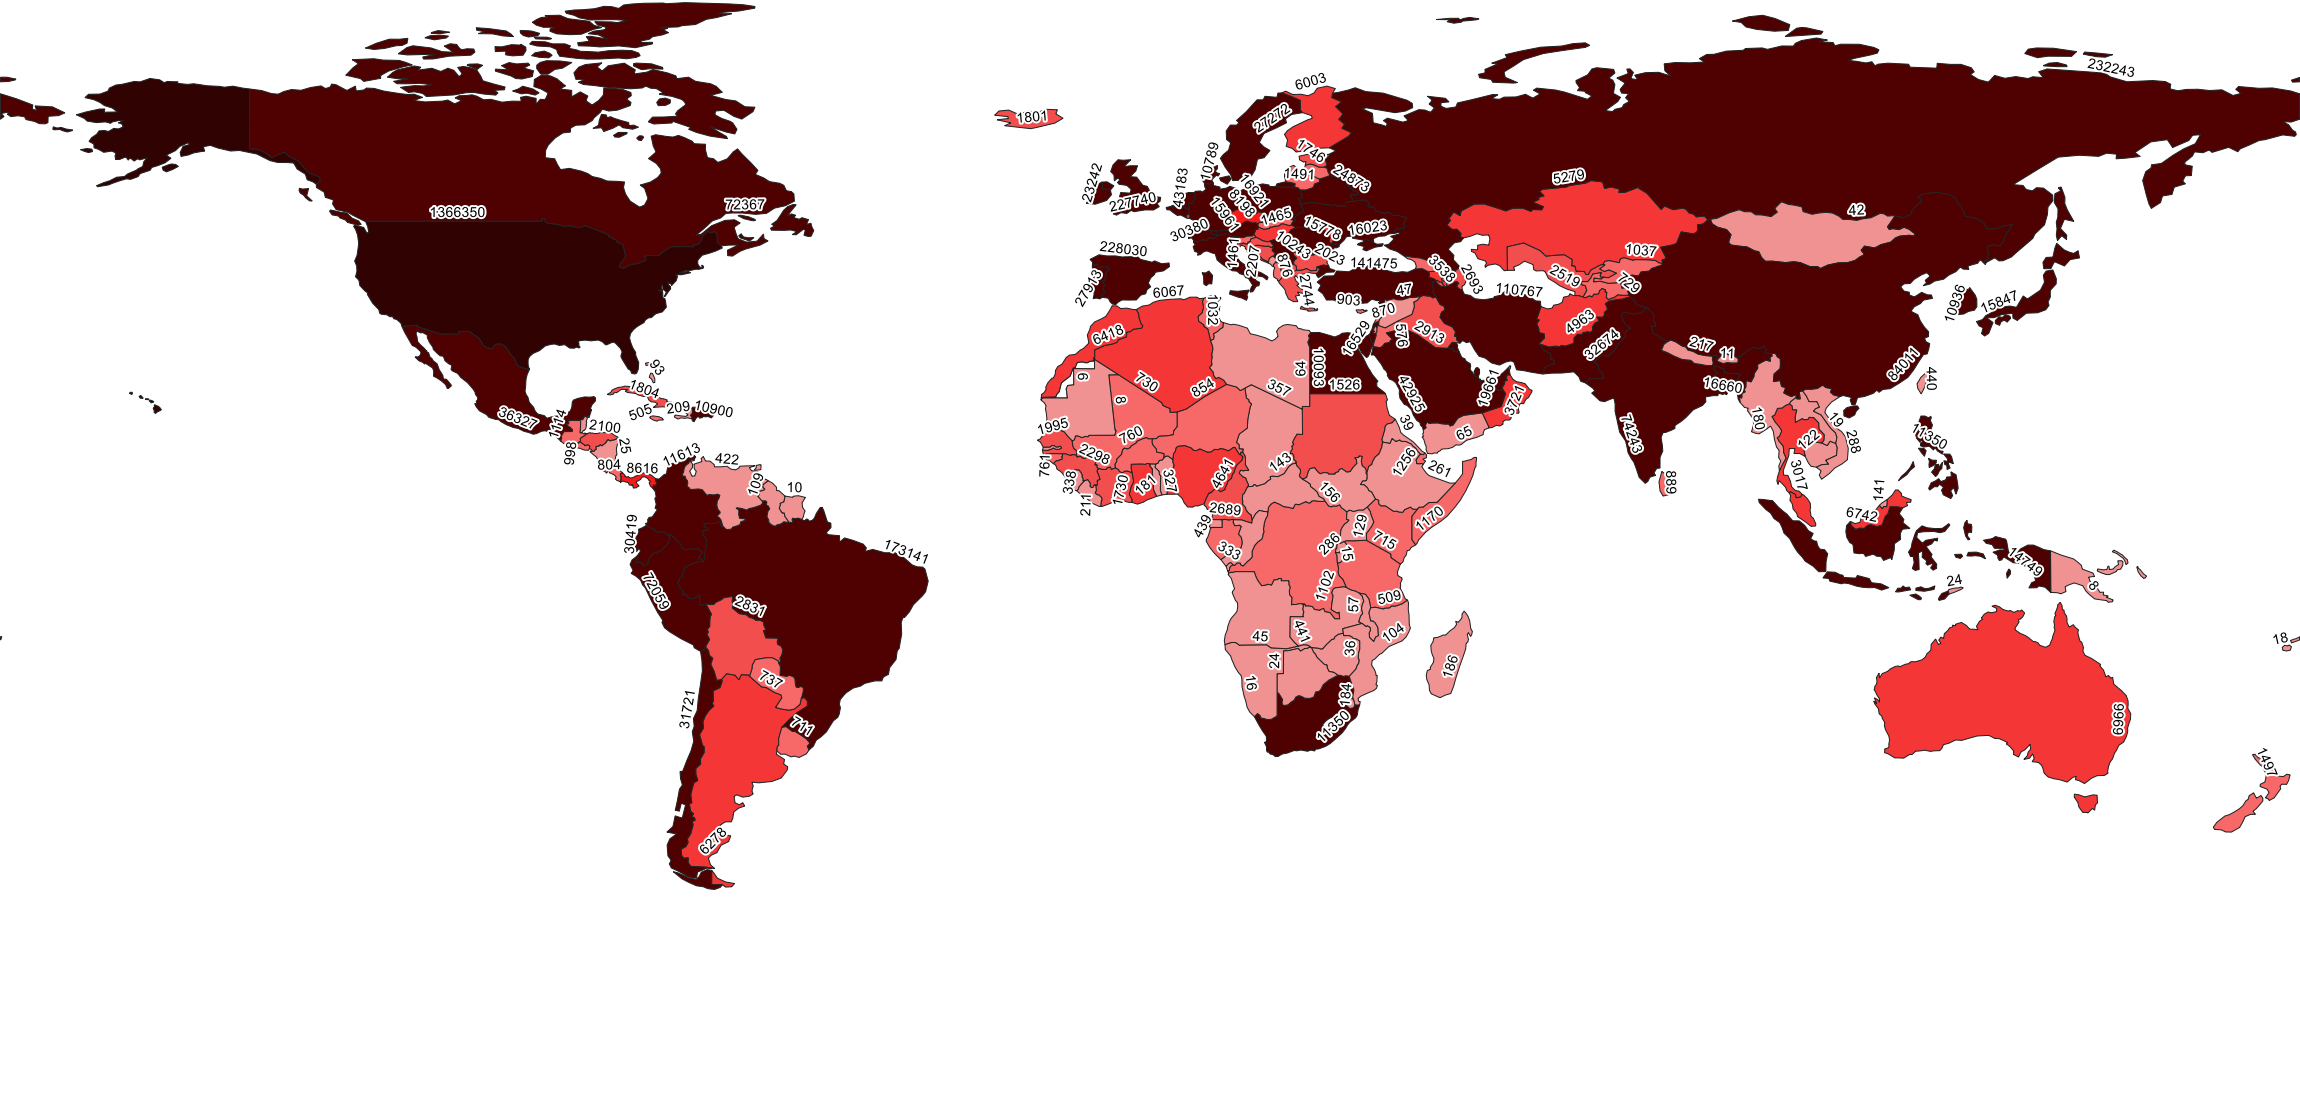

In [12]:
from IPython.display import Image
imgbuf= QBuffer()
imgbuf.open( QIODevice.ReadWrite )
image.save( imgbuf,"PNG" )
image.save('figuras/Mundo_Confirmados.png',"PNG")
Image( imgbuf.data() )

In [13]:
from qgis.PyQt import QtGui
from qgis.PyQt.QtGui import QFont

myVectorLayer = QgsProject.instance().mapLayersByName('Mundo')[0]
targetField = 'Mundo_recovered'
myRangeList = []
myOpacity  = 1
print(myVectorLayer.geometryType())

# Make our first symbol and range...
myMin = 0.0
myMax = 6.0
myLabel = 'Group 1'
myColour = QtGui.QColor('#ffffff')
mySymbol1 = QgsSymbol.defaultSymbol(myVectorLayer.geometryType())
mySymbol1.setColor(myColour)
mySymbol1.setOpacity(myOpacity)
myRange1 = QgsRendererRange(myMin, myMax, mySymbol1, myLabel)
myRangeList.append(myRange1)

#now make another symbol and range...
myMin = 6.0
myMax = 500.0
myLabel = 'Group 2'
myColour = QtGui.QColor('#CCFFDB')
mySymbol2 = QgsSymbol.defaultSymbol(
     myVectorLayer.geometryType())
mySymbol2.setColor(myColour)
mySymbol2.setOpacity(myOpacity)
myRange2 = QgsRendererRange(myMin, myMax, mySymbol2, myLabel)
myRangeList.append(myRange2)

#and another
myMin = 500.0
myMax = 1500.0
myLabel = 'Group 3'
myColour = QtGui.QColor('#93B89E')
mySymbol3 = QgsSymbol.defaultSymbol(
     myVectorLayer.geometryType())
mySymbol3.setColor(myColour)
mySymbol3.setOpacity(myOpacity)
myRange3 = QgsRendererRange(myMin, myMax, mySymbol3, myLabel)
myRangeList.append(myRange3)

#aaaaaaaaaaaahh
myMin = 1500.0
myMax = 3000.0
myLabel = 'Group 4'
myColour = QtGui.QColor('#4CCC72')
mySymbol4 = QgsSymbol.defaultSymbol(
     myVectorLayer.geometryType())
mySymbol4.setColor(myColour)
mySymbol4.setOpacity(myOpacity)
myRange4 = QgsRendererRange(myMin, myMax, mySymbol4, myLabel)
myRangeList.append(myRange4)

#............
myMin = 3000.1
myMax = 7000.0
myLabel = 'Group 5'
myColour = QtGui.QColor('#7FE59E')
mySymbol5 = QgsSymbol.defaultSymbol(
     myVectorLayer.geometryType())
mySymbol5.setColor(myColour)
mySymbol5.setOpacity(myOpacity)
myRange5 = QgsRendererRange(myMin, myMax, mySymbol5, myLabel)
myRangeList.append(myRange5)

#and another one 
myMin = 7000.1
myMax = 10000.0
myLabel = 'Group 6'
myColour = QtGui.QColor('#7FFF7F')
mySymbol6 = QgsSymbol.defaultSymbol(myVectorLayer.geometryType())
mySymbol6.setColor(myColour)
mySymbol6.setOpacity(myOpacity)
myRange6 = QgsRendererRange(myMin, myMax, mySymbol6, myLabel)
myRangeList.append(myRange6)

#and another one 
myMin = 10000.1
myMax = 1000000.0
myLabel = 'Group 7'
myColour = QtGui.QColor('#66FF66')
mySymbol7 = QgsSymbol.defaultSymbol(
     myVectorLayer.geometryType())
mySymbol7.setColor(myColour)
mySymbol7.setOpacity(myOpacity)
myRange7 = QgsRendererRange(myMin, myMax, mySymbol7, myLabel)
myRangeList.append(myRange7)

#and another one 
myMin = 1000000.1
myMax = 999999999999.0
myLabel = 'Group 8'
myColour = QtGui.QColor('#24FF25')
mySymbol8 = QgsSymbol.defaultSymbol(
     myVectorLayer.geometryType())
mySymbol8.setColor(myColour)
mySymbol8.setOpacity(myOpacity)
myRange8 = QgsRendererRange(myMin, myMax, mySymbol8, myLabel)
myRangeList.append(myRange8)


# create the renderer
groupRenderer = QgsGraduatedSymbolRenderer('', myRangeList)
groupRenderer.setMode(QgsGraduatedSymbolRenderer.EqualInterval)
groupRenderer.setClassAttribute(targetField)
 
# apply renderer to layer
vlayer.setRenderer(groupRenderer)

# Add Labels ########
layer_settings  = QgsPalLayerSettings()
text_format = QgsTextFormat()

text_format.setFont(QFont("Arial", 10))
text_format.setSize(10)

buffer_settings = QgsTextBufferSettings()
buffer_settings.setEnabled(True)
buffer_settings.setSize(1)
buffer_settings.setColor(QColor("white"))

text_format.setBuffer(buffer_settings)
layer_settings.setFormat(text_format)

layer_settings.fieldName = "Mundo_recovered"
layer_settings.placement = 2

layer_settings.enabled = True

layer_settings = QgsVectorLayerSimpleLabeling(layer_settings)
vlayer.setLabelsEnabled(True)
vlayer.setLabeling(layer_settings)
vlayer.triggerRepaint()

# add to QGIS interface
QgsProject.instance().addMapLayer(vlayer)

vlayer = QgsProject.instance().mapLayersByName('Mundo')[0]

xt = vlayer.extent()
# print(xt)
width  = 2300
height = int(width*xt.height()/xt.width())
print("Gerar mapa com {} por {}".format(width, height))

options = QgsMapSettings()
options.setLayers([vlayer])
options.setBackgroundColor(QColor(255, 255, 255))
options.setOutputSize(QSize(width, height))
options.setExtent(xt)
           
render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()

image = render.renderedImage()

#for field in vlayer.fields():
#    print(field.name(), field.type())
    

2
Gerar mapa com 2300 por 1109


C:\PROGRA~1\QGIS3~1.10\apps\Python37\lib\site-packages\ipykernel_launcher.py:107: DeprecationWarning: QgsGraduatedSymbolRenderer.setMode() is deprecated


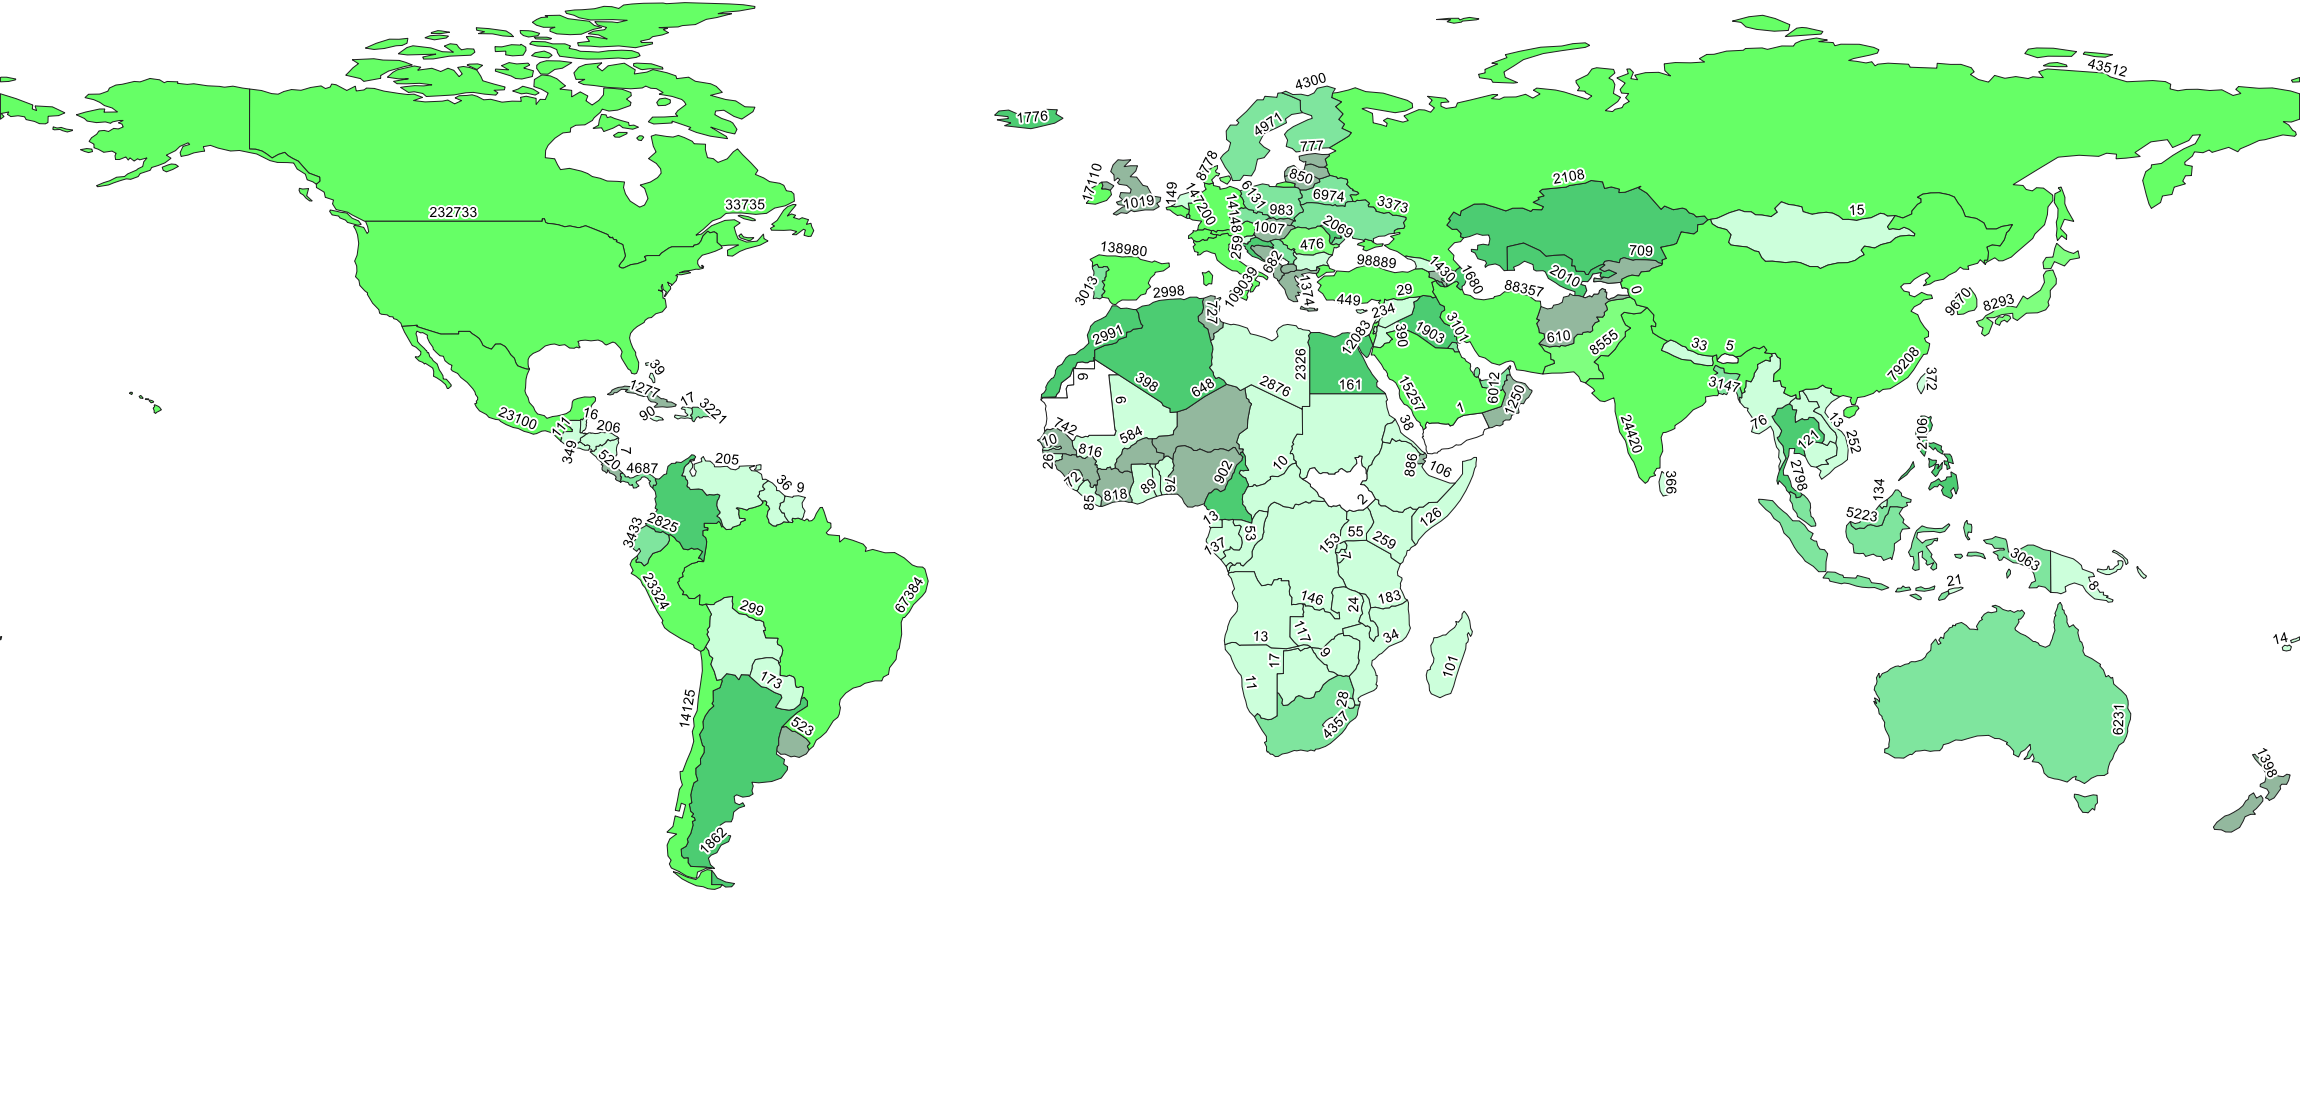

In [14]:
from IPython.display import Image
imgbuf= QBuffer()
imgbuf.open( QIODevice.ReadWrite )
image.save( imgbuf,"PNG" )
image.save('figuras/Mundo_Recuperads.png',"PNG")
Image( imgbuf.data() )